# 09 Hyper-parameter tuning for Deep Q Learning

#### 👉Deep RL is hard, because (among other things) it's very sensitivity to the hyper-parameters.

#### 👉We tune the hyper-parmeters following a trial&error approach:

![](../images/hparams_search_diagram.svg)

#### 👉However, Hyper-parameter spaces in deep RL problems are HUGE. A brute-force solution that would try all possible combinations of hyper-parameters is not feasible. We need something smarter than that...

#### 👉And this is when Bayesian search methods enther into the picture.

#### 👉In a nutshell, Bayesian search methods use past searches to inform promising avenues.

#### 👉 [Optuna](https://optuna.readthedocs.io/en/stable/index.html) is a Python open-source library that implements Bayesian search methods

<img src="https://github.com/Paulescu/hands-on-rl/blob/main/04_cart_pole_tune_hparams_like_a_pro/images/optuna.png?raw=true" width="400"/>

#### 👉Hyper-paramater search a piece of cake 🍰if you use Optuna.

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
import gym
env = gym.make('CartPole-v1')

### MlFlow is a useful tool to track experiment results

cd to the root directory of this lesson (in my case `/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/mlflow_runs`) and spin up the mlflow dashboard as follows:

$ mlflow ui

In [3]:
import mlflow
from src.config import MLFLOW_RUNS_DIR

EXPERIMENT_NAME = 'hyperparameter_search'

mlflow.set_tracking_uri(str(MLFLOW_RUNS_DIR))
mlflow.set_experiment(EXPERIMENT_NAME)

<Experiment: artifact_location='/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/mlflow_runs/0', experiment_id='0', lifecycle_stage='active', name='hyperparameter_search', tags={}>

## Create an Optuna study

In [4]:
import optuna

from src.config import OPTUNA_DB

study = optuna.create_study(
    study_name=EXPERIMENT_NAME,
    direction='maximize',
    load_if_exists=True,
    storage=f'sqlite:///{OPTUNA_DB}'
)

[I 2022-03-01 14:04:05,947] A new study created in RDB with name: hyperparameter_search


## Objective function we want to maximize

In [5]:
from src.optimize_hyperparameters import objective

# we define a lambda function because study.optimize()
# expect the objective function to have only 1 input
# (trial), while our objective function hast 2 extra
# inputs I defined to add flexibility to the script
func = lambda trial: objective(trial,
                               force_linear_model=False,
                               n_episodes_to_train=200)

## Let's start the search

In [ ]:
study.optimize(func, n_trials=100)

/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 93.41it/s]


Reward mean: 63.70, std: 22.21
Num steps mean: 63.70, std: 22.21


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.32it/s]
[I 2022-03-01 14:04:28,366] Trial 0 finished with value: 63.168 and parameters: {'learning_rate': 0.001190816549975692, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 128, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.17336227111765506, 'steps_epsilon_decay': 100000, 'seed': 25634168}. Best is trial 0 with value: 63.168.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:17<00:00,  2.59it/s]


Reward mean: 106.14, std: 20.28
Num steps mean: 106.14, std: 20.28


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.14it/s]
[I 2022-03-01 14:06:12,443] Trial 1 finished with value: 105.102 and parameters: {'learning_rate': 0.000949490608570754, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 100000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.14535289732018808, 'steps_epsilon_decay': 10000, 'seed': 307206316}. Best is trial 1 with value: 105.102.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 42.54it/s]


Reward mean: 27.84, std: 26.38
Num steps mean: 27.84, std: 26.38


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.76it/s]
[I 2022-03-01 14:06:25,820] Trial 2 finished with value: 28.226 and parameters: {'learning_rate': 0.0006465445202769354, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.18781702881511328, 'steps_epsilon_decay': 1000, 'seed': 798794036}. Best is trial 1 with value: 105.102.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 145.45it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.05it/s]
[I 2022-03-01 14:06:30,406] Trial 3 finished with value: 9.374 and parameters: {'learning_rate': 9.344738096982797e-05, 'discount_factor': 0.95, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 256, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.199963887261779, 'steps_epsilon_decay': 10000, 'seed': 1053629446}. Best is trial 1 with value: 105.102.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:19<00:00, 10.03it/s]


Reward mean: 168.78, std: 34.99
Num steps mean: 168.78, std: 34.99


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 22.19it/s]
[I 2022-03-01 14:07:35,813] Trial 4 finished with value: 166.979 and parameters: {'learning_rate': 0.004691802869126356, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.17333673262702784, 'steps_epsilon_decay': 1000, 'seed': 919073533}. Best is trial 4 with value: 166.979.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:46<00:00,  4.26it/s]


Reward mean: 235.74, std: 53.05
Num steps mean: 235.74, std: 53.05


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.64it/s]
[I 2022-03-01 14:09:02,191] Trial 5 finished with value: 234.785 and parameters: {'learning_rate': 0.0003086834947719562, 'discount_factor': 0.95, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.11321207054827075, 'steps_epsilon_decay': 100000, 'seed': 811861304}. Best is trial 5 with value: 234.785.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 238.75it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 561.96it/s]
[I 2022-03-01 14:09:05,297] Trial 6 finished with value: 9.374 and parameters: {'learning_rate': 1.4508328721046025e-05, 'discount_factor': 0.95, 'batch_size': 16, 'memory_size': 50000, 'freq_steps_train': 256, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.09305577255813087, 'steps_epsilon_decay': 1000, 'seed': 133651358}. Best is trial 5 with value: 234.785.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 288.64it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 611.08it/s]
[I 2022-03-01 14:09:07,856] Trial 7 finished with value: 9.374 and parameters: {'learning_rate': 1.1645439814512054e-05, 'discount_factor': 0.95, 'batch_size': 128, 'memory_size': 100000, 'freq_steps_train': 256, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.09541663819538165, 'steps_epsilon_decay': 10000, 'seed': 870731029}. Best is trial 5 with value: 234.785.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 237.78it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 623.38it/s]
[I 2022-03-01 14:09:10,528] Trial 8 finished with value: 9.339 and parameters: {'learning_rate': 3.1021414149064754e-05, 'discount_factor': 0.9, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 256, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.1852224224267246, 'steps_epsilon_decay': 100000, 'seed': 432674234}. Best is trial 5 with value: 234.785.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:57<00:00,  3.48it/s]


Reward mean: 218.98, std: 40.75
Num steps mean: 218.98, std: 40.75


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.23it/s]
[I 2022-03-01 14:10:53,257] Trial 9 finished with value: 216.993 and parameters: {'learning_rate': 0.00015151606093637683, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.023370778563910233, 'steps_epsilon_decay': 10000, 'seed': 717156620}. Best is trial 5 with value: 234.785.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 219.81it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 473.22it/s]
[I 2022-03-01 14:10:56,919] Trial 10 finished with value: 9.374 and parameters: {'learning_rate': 0.007035465036135476, 'discount_factor': 0.9, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.04734280024411143, 'steps_epsilon_decay': 100000, 'seed': 588748619}. Best is trial 5 with value: 234.785.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:41<00:00,  4.82it/s]


Reward mean: 315.52, std: 77.06
Num steps mean: 315.52, std: 77.06


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:19<00:00, 12.56it/s]
[I 2022-03-01 14:12:58,374] Trial 11 finished with value: 318.131 and parameters: {'learning_rate': 0.0001070471863573485, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.00011521015283626548, 'steps_epsilon_decay': 10000, 'seed': 681687734}. Best is trial 11 with value: 318.131.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:51<00:00,  3.88it/s]


Reward mean: 214.20, std: 50.36
Num steps mean: 214.20, std: 50.36


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.74it/s]
[I 2022-03-01 14:14:46,569] Trial 12 finished with value: 214.565 and parameters: {'learning_rate': 0.0002273339508911123, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.0011550265686653767, 'steps_epsilon_decay': 100000, 'seed': 624209401}. Best is trial 11 with value: 318.131.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 81.52it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 512.46it/s]
[I 2022-03-01 14:14:51,294] Trial 13 finished with value: 9.339 and parameters: {'learning_rate': 5.191705146291237e-05, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 128, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.12719306007271317, 'steps_epsilon_decay': 100000, 'seed': 472168800}. Best is trial 11 with value: 318.131.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [04:36<00:00,  1.38s/it]


Reward mean: 500.00, std: 0.00
Num steps mean: 500.00, std: 0.00


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.89it/s]
[I 2022-03-01 14:21:20,932] Trial 14 finished with value: 500.0 and parameters: {'learning_rate': 0.00045095481485457226, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.06286625175600052, 'steps_epsilon_decay': 10000, 'seed': 1049343665}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:32<00:00,  6.24it/s]


Reward mean: 97.73, std: 9.05
Num steps mean: 97.73, std: 9.05


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.35it/s]
[I 2022-03-01 14:22:09,329] Trial 15 finished with value: 98.59 and parameters: {'learning_rate': 0.0021335657905301466, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.06232647827770804, 'steps_epsilon_decay': 10000, 'seed': 1024543596}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 153.10it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 650.22it/s]
[I 2022-03-01 14:22:12,411] Trial 16 finished with value: 9.374 and parameters: {'learning_rate': 0.00044276182547120166, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.06157489547038662, 'steps_epsilon_decay': 10000, 'seed': 270204970}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [02:32<00:00,  1.31it/s]


Reward mean: 19.11, std: 2.78
Num steps mean: 19.11, std: 2.78


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.03it/s]
[I 2022-03-01 14:24:47,980] Trial 17 finished with value: 19.371 and parameters: {'learning_rate': 9.94167087718288e-05, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.002530069118424145, 'steps_epsilon_decay': 10000, 'seed': 663805723}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 56.71it/s]


Reward mean: 16.63, std: 5.28
Num steps mean: 16.63, std: 5.28


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 150.35it/s]
[I 2022-03-01 14:24:58,871] Trial 18 finished with value: 16.952 and parameters: {'learning_rate': 0.0021835319352678426, 'discount_factor': 0.99, 'batch_size': 32, 'memory_size': 100000, 'freq_steps_train': 128, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.029168639450889156, 'steps_epsilon_decay': 10000, 'seed': 967666492}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 91.82it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 394.48it/s]
[I 2022-03-01 14:25:04,029] Trial 19 finished with value: 9.339 and parameters: {'learning_rate': 3.335147161559457e-05, 'discount_factor': 0.9, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.0733458703274872, 'steps_epsilon_decay': 10000, 'seed': 739459688}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [03:46<00:00,  1.13s/it]


Reward mean: 499.44, std: 3.86
Num steps mean: 499.44, std: 3.86


100%|████████████████████████████████████████████████████████████████| 1000/1000 [19:40:02<00:00, 70.80s/it]
[I 2022-03-02 10:08:53,585] Trial 20 finished with value: 498.755 and parameters: {'learning_rate': 0.0001893957820384981, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.025538033790214694, 'steps_epsilon_decay': 10000, 'seed': 531989032}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [02:56<00:00,  1.13it/s]


Reward mean: 107.63, std: 3.21
Num steps mean: 107.63, std: 3.21


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.62it/s]
[I 2022-03-02 10:12:10,837] Trial 21 finished with value: 107.71 and parameters: {'learning_rate': 0.00022661292833295156, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.03033585932383971, 'steps_epsilon_decay': 10000, 'seed': 505029420}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:32<00:00,  2.17it/s]


Reward mean: 128.24, std: 5.95
Num steps mean: 128.24, std: 5.95


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.42it/s]
[I 2022-03-02 10:14:05,736] Trial 22 finished with value: 128.061 and parameters: {'learning_rate': 0.00010194029098196025, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.02142152400907594, 'steps_epsilon_decay': 10000, 'seed': 442227514}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:59<00:00,  3.36it/s]


Reward mean: 65.21, std: 4.96
Num steps mean: 65.21, std: 4.96


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.59it/s]
[I 2022-03-02 10:15:15,737] Trial 23 finished with value: 65.7 and parameters: {'learning_rate': 0.000535003948205984, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.04551215409115748, 'steps_epsilon_decay': 10000, 'seed': 312471990}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:15<00:00, 12.81it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 438.49it/s]
[I 2022-03-02 10:15:33,881] Trial 24 finished with value: 9.374 and parameters: {'learning_rate': 4.7023108960957987e-05, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.012283350090301534, 'steps_epsilon_decay': 10000, 'seed': 567515090}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 17.04it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 407.32it/s]
[I 2022-03-02 10:15:48,387] Trial 25 finished with value: 9.339 and parameters: {'learning_rate': 0.00016285525929636864, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 8, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.043815885703904586, 'steps_epsilon_decay': 1000, 'seed': 862440503}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 98.90it/s]


Reward mean: 14.56, std: 7.30
Num steps mean: 14.56, std: 7.30


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.02it/s]
[I 2022-03-02 10:15:57,481] Trial 26 finished with value: 13.897 and parameters: {'learning_rate': 7.090352534816789e-05, 'discount_factor': 0.9, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.0785312602991963, 'steps_epsilon_decay': 10000, 'seed': 346092096}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 60.64it/s]


Reward mean: 20.08, std: 2.78
Num steps mean: 20.08, std: 2.78


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 251.53it/s]
[I 2022-03-02 10:16:05,098] Trial 27 finished with value: 20.208 and parameters: {'learning_rate': 0.00037229542577420954, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 100000, 'freq_steps_train': 128, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.042336215907993975, 'steps_epsilon_decay': 10000, 'seed': 700460146}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [02:37<00:00,  1.27it/s]


Reward mean: 474.45, std: 47.77
Num steps mean: 474.45, std: 47.77


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:19<00:00, 12.53it/s]
[I 2022-03-02 10:20:02,318] Trial 28 finished with value: 473.532 and parameters: {'learning_rate': 0.0009405600769042816, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.013826186881577503, 'steps_epsilon_decay': 10000, 'seed': 972062230}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 72.62it/s]


Reward mean: 29.28, std: 3.64
Num steps mean: 29.28, std: 3.64


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.70it/s]
[I 2022-03-02 10:20:10,679] Trial 29 finished with value: 28.972 and parameters: {'learning_rate': 0.0015180629263726237, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.055844784477747524, 'steps_epsilon_decay': 1000, 'seed': 969171786}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [02:29<00:00,  1.34it/s]


Reward mean: 234.65, std: 28.50
Num steps mean: 234.65, std: 28.50


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.94it/s]
[I 2022-03-02 10:23:35,735] Trial 30 finished with value: 232.907 and parameters: {'learning_rate': 0.0009273729246061247, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.07964085583745498, 'steps_epsilon_decay': 10000, 'seed': 180215608}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [03:15<00:00,  1.03it/s]


Reward mean: 107.75, std: 4.15
Num steps mean: 107.75, std: 4.15


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.59it/s]
[I 2022-03-02 10:27:23,984] Trial 31 finished with value: 108.151 and parameters: {'learning_rate': 0.000656417983426638, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.01364171682032208, 'steps_epsilon_decay': 10000, 'seed': 1057285542}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 25.02it/s]


Reward mean: 54.65, std: 21.26
Num steps mean: 54.65, std: 21.26


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.35it/s]
[I 2022-03-02 10:27:45,598] Trial 32 finished with value: 52.958 and parameters: {'learning_rate': 0.0002705336590681205, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.03356864523521505, 'steps_epsilon_decay': 10000, 'seed': 970139045}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 107.41it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.94it/s]
[I 2022-03-02 10:27:50,548] Trial 33 finished with value: 9.339 and parameters: {'learning_rate': 0.001125457612516206, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 100000, 'freq_steps_train': 128, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.013773289462828577, 'steps_epsilon_decay': 10000, 'seed': 812752894}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:03<00:00,  3.14it/s]


Reward mean: 296.34, std: 64.97
Num steps mean: 296.34, std: 64.97


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 11.25it/s]
[I 2022-03-02 10:30:23,964] Trial 34 finished with value: 302.22 and parameters: {'learning_rate': 0.000131488588346545, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.007967120687450233, 'steps_epsilon_decay': 10000, 'seed': 883524931}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 75.25it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.54it/s]
[I 2022-03-02 10:30:30,364] Trial 35 finished with value: 9.339 and parameters: {'learning_rate': 0.0007454062576639733, 'discount_factor': 0.99, 'batch_size': 32, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.035428223603432375, 'steps_epsilon_decay': 10000, 'seed': 762124807}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:52<00:00,  3.78it/s]


Reward mean: 86.41, std: 17.67
Num steps mean: 86.41, std: 17.67


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 47.78it/s]
[I 2022-03-02 10:31:44,645] Trial 36 finished with value: 91.917 and parameters: {'learning_rate': 0.003774299395807874, 'discount_factor': 0.9, 'batch_size': 64, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.00016652156496514345, 'steps_epsilon_decay': 10000, 'seed': 1013832985}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 102.66it/s]


Reward mean: 10.85, std: 3.59
Num steps mean: 10.85, std: 3.59


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.09it/s]
[I 2022-03-02 10:31:50,065] Trial 37 finished with value: 11.216 and parameters: {'learning_rate': 0.00041238291026775303, 'discount_factor': 0.95, 'batch_size': 16, 'memory_size': 50000, 'freq_steps_train': 256, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.022455690973340374, 'steps_epsilon_decay': 1000, 'seed': 388421825}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.26it/s]


Reward mean: 28.08, std: 5.30
Num steps mean: 28.08, std: 5.30


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.67it/s]
[I 2022-03-02 10:32:19,134] Trial 38 finished with value: 27.672 and parameters: {'learning_rate': 0.00018254877453239066, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.05203822156837007, 'steps_epsilon_decay': 10000, 'seed': 540045895}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 180.51it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 432.53it/s]
[I 2022-03-02 10:32:22,904] Trial 39 finished with value: 9.339 and parameters: {'learning_rate': 0.0014607561590377308, 'discount_factor': 0.95, 'batch_size': 128, 'memory_size': 100000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.11559037360813038, 'steps_epsilon_decay': 1000, 'seed': 11463593}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 236.93it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 455.39it/s]
[I 2022-03-02 10:32:26,257] Trial 40 finished with value: 9.374 and parameters: {'learning_rate': 0.0003141259548816809, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 50000, 'freq_steps_train': 256, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.07117225988736031, 'steps_epsilon_decay': 100000, 'seed': 931196248}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:07<00:00,  2.98it/s]


Reward mean: 245.06, std: 27.66
Num steps mean: 245.06, std: 27.66


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.54it/s]
[I 2022-03-02 10:34:28,147] Trial 41 finished with value: 247.143 and parameters: {'learning_rate': 0.0001319375969688443, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.01064073422807613, 'steps_epsilon_decay': 10000, 'seed': 890506819}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:08<00:00,  2.90it/s]


Reward mean: 480.68, std: 31.39
Num steps mean: 480.68, std: 31.39


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [03:00<00:00,  5.53it/s]
[I 2022-03-02 10:38:38,736] Trial 42 finished with value: 482.164 and parameters: {'learning_rate': 0.00011489306610426707, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.020593338183693584, 'steps_epsilon_decay': 10000, 'seed': 810692493}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:42<00:00,  4.75it/s]


Reward mean: 236.24, std: 112.26
Num steps mean: 236.24, std: 112.26


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:13<00:00, 13.68it/s]
[I 2022-03-02 10:40:34,941] Trial 43 finished with value: 252.098 and parameters: {'learning_rate': 7.049781912886317e-05, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.01979656348960822, 'steps_epsilon_decay': 10000, 'seed': 810884825}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:15<00:00, 12.68it/s]


Reward mean: 9.51, std: 0.92
Num steps mean: 9.51, std: 0.92


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 503.93it/s]
[I 2022-03-02 10:40:53,192] Trial 44 finished with value: 9.339 and parameters: {'learning_rate': 2.39468698222562e-05, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.15563418660796358, 'steps_epsilon_decay': 10000, 'seed': 661872794}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:15<00:00, 12.92it/s]


Reward mean: 439.97, std: 93.70
Num steps mean: 439.97, std: 93.70


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.42it/s]
[I 2022-03-02 10:42:36,789] Trial 45 finished with value: 445.083 and parameters: {'learning_rate': 0.0002254625392998033, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.03925432963256639, 'steps_epsilon_decay': 10000, 'seed': 839214081}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [02:30<00:00,  1.33it/s]


Reward mean: 285.07, std: 171.71
Num steps mean: 285.07, std: 171.71


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:53<00:00,  8.81it/s]
[I 2022-03-02 10:47:01,437] Trial 46 finished with value: 270.729 and parameters: {'learning_rate': 0.00020704983721040973, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.03654539632149404, 'steps_epsilon_decay': 10000, 'seed': 1002010038}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 48.58it/s]


Reward mean: 28.09, std: 25.46
Num steps mean: 28.09, std: 25.46


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 52.76it/s]
[I 2022-03-02 10:47:25,594] Trial 47 finished with value: 27.505 and parameters: {'learning_rate': 0.000550055669498527, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 256, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.06277694208185883, 'steps_epsilon_decay': 100000, 'seed': 1073230746}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 24.14it/s]


Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 293.84it/s]
[I 2022-03-02 10:47:38,783] Trial 48 finished with value: 9.374 and parameters: {'learning_rate': 7.005564689957478e-05, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.09068755599469536, 'steps_epsilon_decay': 10000, 'seed': 852934938}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:33<00:00,  2.14it/s]


Reward mean: 118.11, std: 2.42
Num steps mean: 118.11, std: 2.42


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.22it/s]
[I 2022-03-02 10:50:11,534] Trial 49 finished with value: 118.085 and parameters: {'learning_rate': 0.0008847424619934476, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.027167912245689395, 'steps_epsilon_decay': 10000, 'seed': 928188238}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 37.53it/s]


Reward mean: 9.58, std: 1.31
Num steps mean: 9.58, std: 1.31


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.70it/s]
[I 2022-03-02 10:50:23,833] Trial 50 finished with value: 9.572 and parameters: {'learning_rate': 0.00027017831501392563, 'discount_factor': 0.95, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 128, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.0526106127445451, 'steps_epsilon_decay': 10000, 'seed': 615410351}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:33<00:00,  2.14it/s]


Reward mean: 491.95, std: 21.87
Num steps mean: 491.95, std: 21.87


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [02:18<00:00,  7.20it/s]
[I 2022-03-02 10:54:17,930] Trial 51 finished with value: 494.154 and parameters: {'learning_rate': 0.0001114266793516042, 'discount_factor': 0.9, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.01811968057602956, 'steps_epsilon_decay': 10000, 'seed': 784391538}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [01:46<00:00,  1.88it/s]


Reward mean: 138.56, std: 81.91
Num steps mean: 138.56, std: 81.91


100%|███████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.11it/s]
[I 2022-03-02 10:57:15,673] Trial 52 finished with value: 135.905 and parameters: {'learning_rate': 0.0001294070616472532, 'discount_factor': 0.9, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.019381627932727494, 'steps_epsilon_decay': 10000, 'seed': 767117047}. Best is trial 14 with value: 500.0.
/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole/.venv/lib/python3.7/site-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)


67,586 parameters


 95%|█████████████████████████████████████████████████████████████████▌   | 190/200 [01:23<00:16,  1.62s/it]

## These are the best hyper-parameters

In [8]:
best_trial = study.best_trial

hparams = {k: best_trial.params[k] for k in best_trial.params if k != 'seed'}
hparams['nn_hidden_layers'] = eval(hparams['nn_hidden_layers']) 
print(hparams)

SEED = best_trial.params['seed']
print('Seed: ', SEED)

{'batch_size': 64, 'discount_factor': 0.99, 'epsilon_end': 0.04236008167088738, 'epsilon_start': 0.9, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'learning_rate': 0.00042271527475284823, 'max_grad_norm': 10, 'memory_size': 50000, 'n_gradient_steps': 4, 'n_steps_warm_up_memory': 1000, 'nn_hidden_layers': [256, 256], 'normalize_state': False, 'steps_epsilon_decay': 100000}
Seed:  186056349


## We can re-run the training to get the perfect agent

In [11]:
from src.utils import set_seed
set_seed(env, SEED)

from src.q_agent import QAgent
agent = QAgent(env, **hparams)

from src.loops import train
train(agent, env, n_episodes=200)

67,586 parameters


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:13<00:00, 15.12it/s]

Reward mean: 337.64, std: 29.49
Num steps mean: 337.64, std: 29.49


## or simply load the `agent_id` from the best run

In [3]:
from src.q_agent import QAgent
from src.config import SAVED_AGENTS_DIR

# you can find the agent_id for the best run in the MLflow
# dashboard.
# 280 is the value in my case, but you need to check what is your
agent_id = 298

path_to_saved_model = SAVED_AGENTS_DIR / 'CartPole-v1' / str(agent_id)
agent = QAgent.load_from_disk(env, path_to_saved_model)

67,586 parameters


## Evaluate the agent ⏱️

In [4]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|███████████████████████████████████████████████████████████████████| 1000/1000 [03:00<00:00,  5.54it/s]


In [5]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 500.00, std 0.00


## Let's see how far we got in each attempt

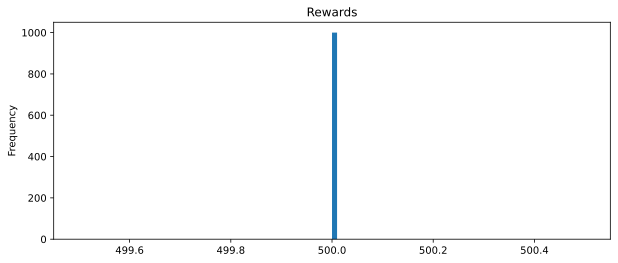

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

In [49]:
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=123)